# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.18 which is incompatible.


In [2]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [3]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
# create a new agent
agent = Agent(state_size=brain.vector_observation_space_size, action_size=brain.vector_action_space_size, random_seed=2)

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

Episode 25	Average Score: 0.30 score over the last 10 episodes: 0.18


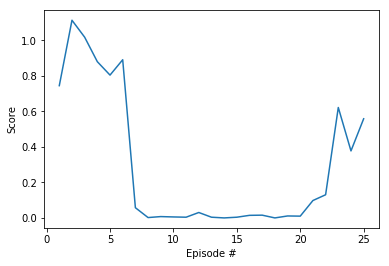

Episode 50	Average Score: 0.98 score over the last 10 episodes: 1.28


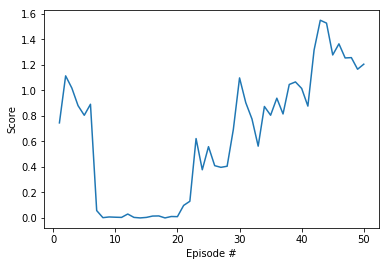

Episode 75	Average Score: 1.55 score over the last 10 episodes: 1.79


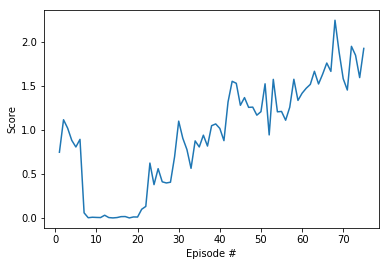

Episode 100	Average Score: 3.25 score over the last 10 episodes: 3.91


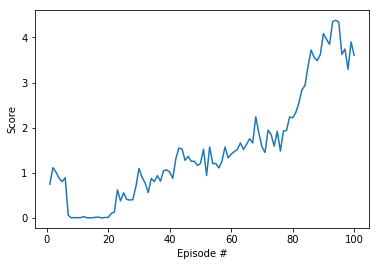

Episode 125	Average Score: 5.94 score over the last 10 episodes: 6.62


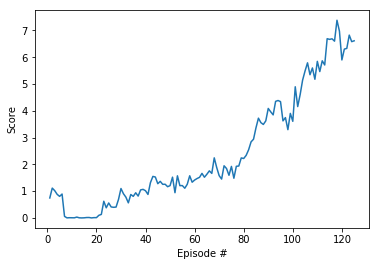

Episode 150	Average Score: 10.09 score over the last 10 episodes: 11.48


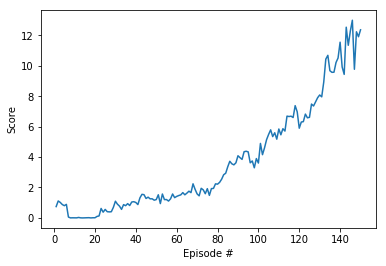

Episode 175	Average Score: 14.91 score over the last 10 episodes: 16.50


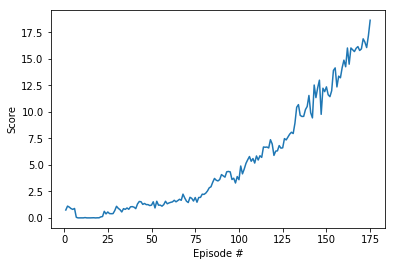

Episode 200	Average Score: 19.41 score over the last 10 episodes: 20.96


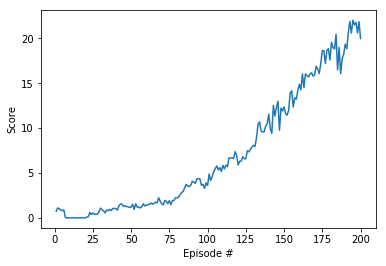

Episode 225	Average Score: 22.69 score over the last 10 episodes: 24.40


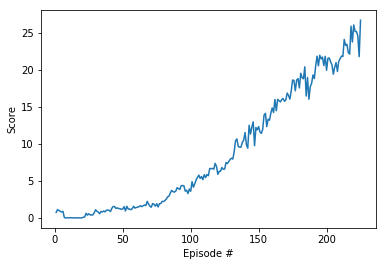

Episode 250	Average Score: 27.53 score over the last 10 episodes: 29.77


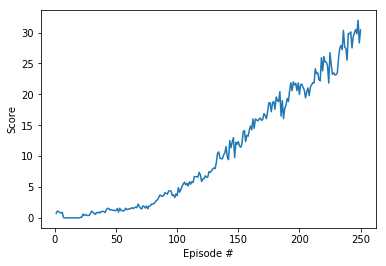

Episode 264	score: 32.97	average score over the last 10 episodes: 30.88
Environment solved in 164 episodes!	Average Score: 30.21


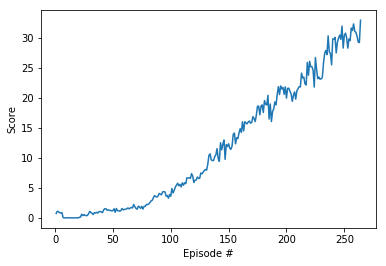

In [6]:
def ddpg(n_episodes=10000, max_t=3000, print_every=25):
    scores_deque = deque(maxlen=print_every)
    scores = []
    beta = 0.1  # factor the random noise gets multiplied with
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations  # get the current states
        e_scores = np.zeros(20)  # the scores of an episode for each of the 20 reachers
        agent.reset()
        for t in range(max_t):
            actions = agent.act(states, noise_factor=beta)# let the agent select actions
            env_info = env.step(actions)[brain_name]      # execute the selected actions and save the new information about the environment
            rewards = env_info.rewards                    # get the rewards
            next_states = env_info.vector_observations    # get the resulting states
            dones = env_info.local_done                   # check whether episodes have finished
            agent.step(states, actions, rewards, next_states, dones)  # pass the information to the agent
            states = next_states
            e_scores += rewards
            if np.any(dones):
                break 
        avg_score = np.mean(e_scores)  # the average score of the agents
        scores_deque.append(avg_score)
        scores.append(avg_score)
        beta = max(0.995 * beta, 0.01)  # reduce the noise a bit while training
        print('\rEpisode {:d}\tscore: {:.2f}\taverage score over the last 10 episodes: {:.2f}'.format(i_episode, scores_deque[-1], np.mean(list(scores_deque)[-10:])), end="")
        if i_episode > 100 and np.mean(scores_deque) > 30:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_deque)))
            break
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            plt.plot(np.arange(1, len(scores)+1), scores)
            plt.ylabel('Score')
            plt.xlabel('Episode #')
            plt.show()
            
    return scores

scores = ddpg()
env.close()  # close the environment as it is no longer needed

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [7]:
env.close()

UnityEnvironmentException: No Unity environment is loaded.